**II. Formulation of the Problem of Generating Combinatorial Objects**

In most of the generation problems, we have:

Each object (can be?) is represented by an array X[1:N]

The elements of the array are taken from a domain S={a1,a2,...,am}. Often, S is a finite set of successive integers.

The values of array X must satisfy some constraints C so that X represents a legitimate object of the type in question.

We will show the specifics in each of the following instances of combinatorial object generation

**Problem 8: Generation of all k-colorings of a given graph G=(V,E) of n nodes, where k is an integer, 1 <= k <= n**
* A k-coloring of G is an assignment of a color to each node in such a way that every two neighboring nodes have distinct colors, and the total number of colors used is <= k. The colors can be conveniently labeled 1,2,...,k.
* A k-coloring can be represented by an array X[1:n] where X[i] is the color of node i.
* Each X[i] takes its values from the set of colors {1,2,...,k}

Constraints: 
* If (i,j) is an edge in G, then X[i] != X[j]

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

def loadADJ(N):
    #load the AJD matrix from a txt file into an array an return it
    #we are using random num generation for now to make it work simple
    ADJ = np.random.choice([0,1],(N,N))
    print "Generating a random " + str(N) + " * " + str(N)+" directed adjacency Graph.\n The Input Matrix: "
    print ADJ
    G=nx.MultiDiGraph(ADJ)
    nx.draw(G,nodecolor='r',edge_color='b',with_labels=True)
    plt.show()
    return ADJ
    
    

In [7]:
def isEdge(node1,node2):
    #checks the ADJ matric to verify if (node1,node2) is an edge. for this probelm an edge in any direction is fine
    if ADJ[node1][node2]==1 or ADJ[node2][node1]==1:
        return True
    else:
        return False

In [12]:
def Bound(X,r):
    #print "current state of X and r is " + str(X) + " -- r:" + str(r)
    for i in range(0,r):     #elements 0 to r-1 have been set. we are checking for element r
        if isEdge(i,r) and X[i]==X[r]:
            #line below is for debugging
            #print X[i],X[r],isEdge(X[i],X[r])
            return False
    return True
        

In [13]:
def getNext(X,r):
    X[r]=X[r]+1
    while X[r] <=K-1:  #while X[r] is in domian; here the domain is [0..K-1]: K possible colors
        if Bound(X,r)==True :
            return
        else:
            X[r]=X[r] +1 
    
    X[r]=a0 

Enter the total number of nodes in the Graph: 5
Enter K, the number of colors: 3
Generating a random 5 * 5 directed adjacency Graph.
 The Input Matrix: 
[[0 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 1 0]
 [1 1 1 0 1]
 [0 1 1 1 0]]


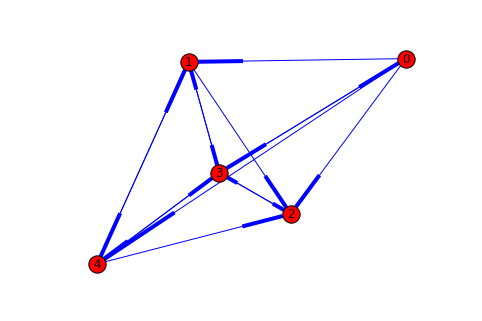

The initial state of X is : [-1, -1, -1, -1, -1]
This graph has no 3 coloring


In [14]:
### Backtracking
import numpy as np

r=0     #r is the tree level, or index of X. 
X=[]     #X represent one instance of a Hamiltonian cycle in the graph 
a0=-1    # this is an initial value for elements of X. pick something that tells
         #       this element has not been assigned yet
N = int(raw_input("Enter the total number of nodes in the Graph: "))  # Size of the array. change based on your problem 
K = int(raw_input("Enter K, the number of colors: "))
ADJ = loadADJ(N)        # this function creates an ADJ matric from a txt file or random number generation


for i in range(0,N):
    X.append(a0)
    
print "The initial state of X is : " + str(X)
found = False
    
while r>-1:
    getNext(X,r)
    if (X[r]==a0):
        r=r-1
    elif r==N-1:
        print "found a solution: " + str(X)
        #trying to show a grpah coloring: use different colots for different nodes
        #G=nx.MultiDiGraph(ADJ)
        #nx.draw(G,nodecolor='r',edge_color='b',with_labels=True)
        #plt.show()
        found = True
    else:
        r=r+1

if not found:
    
    print "This graph has no " + str(K) + " coloring"